   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
Accuracy: 0.9719806763285024
Precision: 0.9551724137931035
Recall: 0.9453924914675768

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



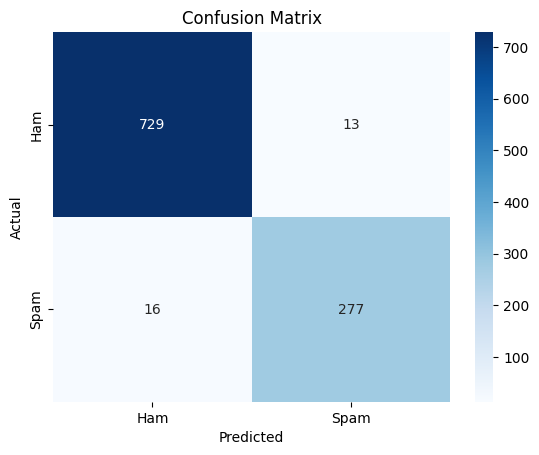

🚨 Prediction (1=Spam, 0=Ham): 1


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv("spam_ham_dataset.csv")

# Check the first few rows to confirm structure
print(df.head())

# Step 2: Rename / Select necessary columns if needed
# Adjust these lines if your columns are different
df = df[['label', 'text']]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Step 4: Convert text into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train the classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test_vec)

# Step 10: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

sample = ["Urgent! Your bank account is at risk. Click the link to secure it."]
sample_vec = vectorizer.transform(sample)
print("🚨 Prediction (1=Spam, 0=Ham):", model.predict(sample_vec)[0])